<a href="https://colab.research.google.com/github/kumarkaushaliimu/Model_explainability/blob/main/SHAP_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Reference https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [3]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 23.2 MB/s eta 0:00:00


In [4]:
import pandas as pd
import shap
import sklearn

# a classic housing price dataset
X,y = shap.datasets.california(n_points=1000)

X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [5]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))


Model coefficients:

MedInc = 0.45769
HouseAge = 0.01153
AveRooms = -0.12529
AveBedrms = 1.04053
Population = 5e-05
AveOccup = -0.29795
Latitude = -0.41204
Longitude = -0.40125


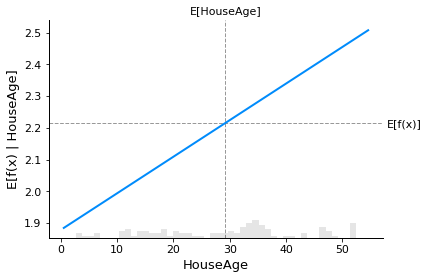

In [7]:
shap.partial_dependence_plot(
    "HouseAge", model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

Exact explainer: 1001it [00:10,  5.05it/s]                          


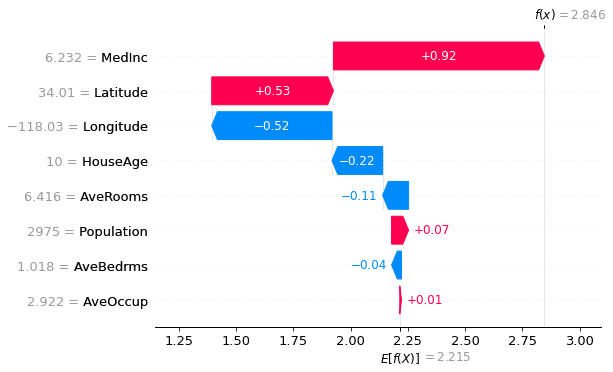

In [10]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)
sample_ind = 20
shap.plots.waterfall(shap_values[sample_ind], max_display=14)